## Pergunta a ser respondida:
Os três principais objetivos da OCDE (Organização para a Cooperação e Desenvolvimento Económico) é que seus membros, ao ingressarem na organização, tenham a possibilidade de desenvolver a economia, o emprego e o nível de vida em seus países.  Dessa forma, foi elaborado a seguinte hipótese: Ao se tornar membro desta organização, quais setores, sendo eles economia, emprego e nível de vida, são mais beneficiados?


## Explicação da hipótese e mecanismo:
Logo, após elaborar a hipótese, foi iniciado a busca por dados, pesquisas sobre a Organização e seus países membros. Assim, primeiramente foram selecionados quais seriam os países escolhidos para validar a hipótese, sendo eles Israel, Chile e Estônia; pois tais países entraram no ano de 2010, possuindo um maior período de análise, mais dados e maior tempo de influência da OCDE em seus países.

Dessa maneira, quatro bases de dados foram analisadas e utilizadas para compor a pesquisa, entre elas estão a taxa de desemprego anual e o GDP por trabalhador de cada país para analisar se a taxa de empregados aumentou e melhorou ao decorrer dos anos. Para o setor econômico foi analisado o GDP dos países membros e, para medir se o nível de vida melhorou, foi utilizado o IDH. Afinal, com a ajuda desses dados foi possível analisar analíticamente todos os anos, principalmente antes, durante e depois da entrada; e ver como foi o comportamento desses dados durante esse período. A utilização destes permitiu uma visão mais ampla, tanto da parte econômica quanto da social dos países escolhidos.

Após isso, foi necessário escolher quais países seriam utilizados para comparar os dados. Assim, um dos critérios analisados para escolher tal país foi um IDH parecido e, depois de ler mais sobre a Organização, foi possível descobrir que ela só aceita países compostos por economias com um elevado PIB per capita e Índice de Desenvolvimento Humano e que são considerados países desenvolvidos. Logo, com tal conceito em mente, a Colômbia e a Alemanha foram escolhidas como países à serem comparados, pois eles são países que assinaram ou estão assinando o acordo de adesão mas ainda não são membros, ou seja, possuem um desenvolvimento semelhante aos outros escolhidos. Sendo assim uma forma justa de comparar.

Dessa forma, foi possível reunir informações o suficiente as quais poderiam ser capazes de comprovar ou refutar a hipótese.


## Recursos de busca:
- https://www.cafetorah.com/taxa-de-desemprego-em-israel-e-a-menor-em-50-anos/
- https://internacional.estadao.com.br/noticias/geral,antes-e-depois-a-economia-dos-ultimos-paises-a-entrar-na-ocde,70002762360
- https://economia.estadao.com.br/noticias/geral,o-emprego-reflete-a-economia,10000014535
- https://pt.wikipedia.org/wiki/Organiza%C3%A7%C3%A3o_para_a_Coopera%C3%A7%C3%A3o_e_Desenvolvimento_Econ%C3%B3mico




In [132]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

import os
print(os.getcwd())

C:\Users\ana clara\Downloads


## Base de dados

Desemprego:
https://www.gapminder.org/tools/#$state$marker$axis_y$which=aged_15plus_unemployment_rate_percent&scaleType=linear&spaceRef:null;;;&chart-type=linechart

PIB/trabalhador:
https://www.gapminder.org/tools/#$state$time$value=2018;&entities$show$country$/$in@=isr&=chl&=est;;;;&marker$axis_y$which=gdpperemployee_us_inflation_adjusted&spaceRef:null;;;&chart-type=linechart

IDH: https://www.gapminder.org/tools/#$state$time$value=2015;&marker$axis_y$which=hdi_human_development_index&scaleType=linear&spaceRef:null;;;&chart-type=linechart

PIB/capita: https://www.gapminder.org/tools/#$state$marker$axis_y$which=gdp_per_capita_yearly_growth&scaleType=linear&spaceRef:null;;;&chart-type=linechart


In [297]:
desemprego = pd.read_excel('aged_15plus_unemployment_rate_percent.xlsx')
gdp_trabalhador = pd.read_excel('gdpperemployee_us_inflation_adjusted.xlsx')
idh = pd.read_excel('hdi_human_development_index.xlsx')
gdp_total = pd.read_excel('gdp_per_capita_yearly_growth.xlsx')

## Tabela de membros da OCDE

In [273]:
paises_na_OCDE = []
paises_OCDE = ["Áustria", "Bélgica", 'Dinamarca', 'França', 'Grécia', 'Islândia', 'Irlanda', 'Itália', 'Luxemburgo', 'Noruega', 'Países Baixos', 'Portugal', 'Reino Unido', 'Suécia', 'Suíça', 'Turquia', 'Alemanha', 'Espanha', 'Canadá', 'Estados Unidos', 'Japão', 'Finlândia', 'Austrália', 'Nova Zelândia', 'México', 'República Checa', 'Hungria', 'Polónia', 'Coreia do Sul', 'Eslováquia', 'Chile', 'Eslovênia', 'Israel', 'Estônia', 'Letônia', 'Lituânia']
for pais in desemprego ["país"]:
    if pais in paises_OCDE:
        paises_na_OCDE.append("sim")
    else:
        paises_na_OCDE.append('não')
dados_novosD["Está na OCDE"]=paises_na_OCDE
dados_quali = dados_novosD.iloc[:,71:72]
dados_=dados_quali[~dados_novosD[1998].isin(["NaN"])]
quali = dados_.loc[["Israel","Chile","Estônia","Colômbia","Argentina"]]
quali.head()


,Está na OCDE
país,
Israel,sim
Chile,sim
Estônia,sim
Colômbia,não
Argentina,não


Nessa tabela qualitativa fica mais claro quais países foram selecionados para a análise, sendo eles membros ou não.

# Analisando o desemprego

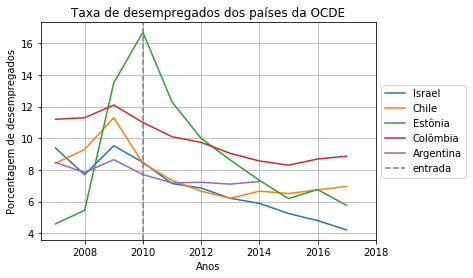

In [260]:
dados_novosD = desemprego.set_index("país")    
dados_novo = dados_novosD.iloc[:,60:74]
dados_limposD=dados_novo[~dados_novosD[2007].isin(["NaN"])]
dados_paisesD = dados_limposD.loc[["Israel","Chile","Estônia","Colômbia","Argentina"]]


dados_testeD = dados_paisesD.transpose()
plt.plot(dados_paisesD.loc["Israel"])
plt.plot(dados_paisesD.loc["Chile"])
plt.plot(dados_paisesD.loc["Estônia"])
plt.plot(dados_paisesD.loc["Colômbia"])
plt.plot(dados_paisesD.loc["Argentina"])
plt.xlabel('Anos')
plt.ylabel("Porcentagem de desempregados")
plt.title('Taxa de desempregados dos países da OCDE')
plt.axvline(x=2010, color = "grey", linestyle = "--", label = "entrada")
ax = plt.subplot(111)
ax.legend(loc="center left", bbox_to_anchor = (1,0.5))
plt.xticks([2008,2010,2012,2014,2016,2018])
plt.grid()


Neste gráfico é possível ver as taxas de desemprego dos países selecionados ao decorrer dos anos. Assim é possível analisar que os membros, antes de ingressarem na Organização, já possuiam um taxa decrescente, entretanto, após ao entrarem, é percebível uma aceleração significativa na queda desses valores, principalmente em Israel e na Estônia. Agora, analisando os não-membros, antes do período de entrada, as taxa deles também estavam caindo, todavia, pós a entrada é perceptível que eles não conseguiram manter a queda desses valores, o que gerou um pequeno aumento constante ao decorrer do anos.


<Figure size 432x288 with 0 Axes>

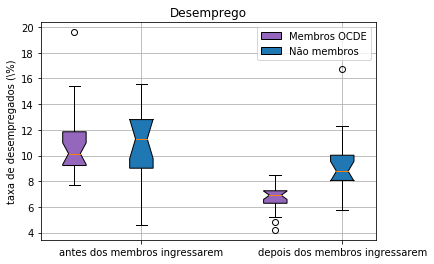

In [268]:
dados_paises = dados_novos.iloc[:,55:75]
dados_novos = desemprego.set_index("país")
dados_novo1 = dados_novos.iloc[:,55:63]
dados_limpos1=dados_novo1[~dados_novos[2002].isin(["NaN"])]

dados_novo2 = dados_novos.iloc[:,63:75]
dados_limpos2=dados_novo2[~dados_novos[2010].isin(["NaN"])]

dados_membros2_9 = dados_limpos1.loc[["Argentina","Chile","Israel"]]
dados_nao_membros2_9 = dados_limpos1.loc[["Colômbia","Estônia"]]

nao_membros2_9 = dados_nao_membros2_9.stack()
membros2_9 = dados_membros2_9.stack()

dados_membros10_17 = dados_limpos2.loc[["Argentina","Chile","Israel"]]
dados_nao_membros10_17 = dados_limpos2.loc[["Colômbia","Estônia"]]

nao_membros10_17 = dados_nao_membros10_17.stack()
membros10_17 = dados_membros10_17.stack()

plt.figure()
fig, ax = plt.subplots()
plt.title("Desemprego")
plt.ylabel("taxa de desempregados (\%)")
membros = ax.boxplot([membros2_9,membros10_17], positions=[1,4], notch=True, widths=0.35, 
                 patch_artist=True, boxprops=dict(facecolor="C4"))
nao_membros = ax.boxplot([nao_membros2_9,nao_membros10_17], positions=[2,5], notch=True, widths=0.35, 
                 patch_artist=True, boxprops=dict(facecolor="C0"))
ax.legend([membros["boxes"][1], nao_membros["boxes"][1]], ['Membros OCDE', 'Não membros'], loc='upper right')
ax.set_xlim(0.5)
plt.gca().set_xticklabels(["antes dos membros ingressarem",'depois dos membros ingressarem'])
plt.grid(which='both')
plt.show()

Nesse gráfico, ao invés de comparar os países individualmente, foi feito a junção dos países membros em um lado e do outro, os não membros, para que fosse possível comparar em um âmbito geral as taxas de desemprego. Assim, ao analisar o boxplot, é percebível que os países que ingressaram na Organização, além de possuírem menores taxas de desemprego, também obtiveram uma queda maior.

# Analisando o PIB por trabalhador

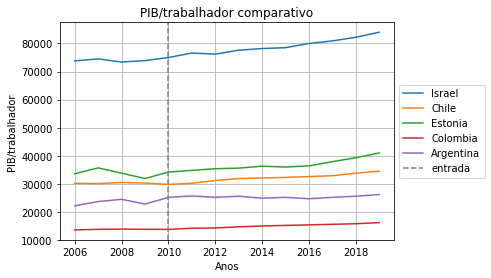

In [281]:
dados_testeGPD = dados_paisesGDP.transpose()
plt.plot(dados_paisesGDP.loc["Israel"])
plt.plot(dados_paisesGDP.loc["Chile"])
plt.plot(dados_paisesGDP.loc["Estonia"])
plt.plot(dados_paisesGDP.loc["Colombia"])
plt.plot(dados_paisesGDP.loc["Argentina"])
plt.xlabel('Anos')
plt.ylabel("PIB/trabalhador")
plt.title('PIB/trabalhador comparativo')
plt.axvline(x=2010, color = "grey", linestyle = "--", label = "entrada")
ax = plt.subplot(111)
ax.legend(loc="center left", bbox_to_anchor = (1,0.5))
plt.xticks([2006,2008,2010,2012,2014,2016,2018])
plt.grid()

Juntamente com o desemprego, o PIB/trabalhador também é uma base de dados que ajuda na análise do aumento do emprego. Assim, esse gráfico mostra ao decorrer dos anos o comportamento deste PIB, sendo percebível que todos os países analisados mantiveram a mesma variação durante o período analisado. Assim, o gráfico abaixo deixa mais claro se realmente houve um aumento e de quanto ele foi.

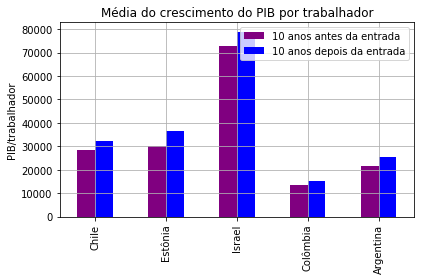

In [288]:
dados_novosGDP = gdp_trabalhador.set_index("country")
dados_novosGDP = dados_novosGDP.iloc[:,15:29]
dados_paisesGDP = dados_novosGDP.loc[["Israel","Chile","Estonia","Colombia",'Argentina']]

media = {"Chile":[28600,32130],"Estônia":[30220,36690],"Israel":[72820,78920],"Colômbia":[13510,15020],"Argentina":[21560,25350]}
dados_media = pd.DataFrame.from_dict(media, orient = "index", columns = ["10 anos antes da entrada","10 anos depois da entrada"])

dados_media.plot(kind = 'bar', color = ("purple","blue"))
plt.ylabel("PIB/trabalhador")
plt.title('Média do crescimento do PIB por trabalhador')
plt.grid()
plt.tight_layout()



Entretanto, ao analisar a média do crescimento 10 anos antes de entrar e 10 anos depois de entrar, fica mais visível que realmente houve uma diferença de valores depois pós-entrada. Tais valores estão apresentados no gráfico seguinte.

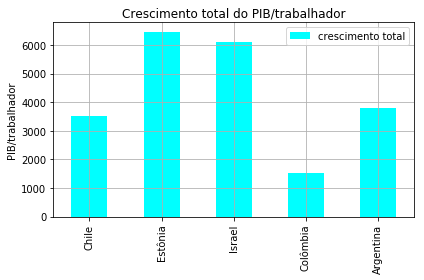

In [289]:
media1 = {"Chile":[3530],"Estônia":[6470],"Israel":[6100],"Colômbia":[1510],"Argentina":[3790]}
dados_media1 = pd.DataFrame.from_dict(media1, orient = "index", columns = ["crescimento total"])

dados_media1.plot(kind = 'bar', color = ("cyan"))
plt.ylabel("PIB/trabalhador")
plt.title('Crescimento total do PIB/trabalhador')
plt.grid()
plt.tight_layout()


Assim, a partir desse gráfico fica mais evidente que os países dentro da OCDE tiveram um crescimento mais elevado do que os não-membros

# Analisando o PIB

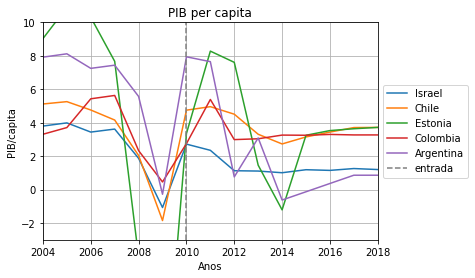

In [294]:
dados_testeGDP_total = dados_paisesGDP_total.transpose()
plt.plot(dados_paisesGDP_total.loc["Israel"])
plt.plot(dados_paisesGDP_total.loc["Chile"])
plt.plot(dados_paisesGDP_total.loc["Estonia"])
plt.plot(dados_paisesGDP_total.loc["Colombia"])
plt.plot(dados_paisesGDP_total.loc["Argentina"])
plt.xlabel('Anos')
plt.ylabel("PIB/capita")
plt.title('PIB per capita')
plt.axvline(x=2010, color = "grey", linestyle = "--", label = "entrada")
ax = plt.subplot(111)
ax.legend(loc="center left", bbox_to_anchor = (1,0.5))
plt.axis([2009,2013,-3,10])
plt.xticks([2004,2006,2008,2010,2012,2014,2016,2018])
plt.grid()

Neste gráfico foi plotado o pib per capita durante o tempo analisado. Assim, é visto que antes do período de entrada, o comportamento do pib era bastante irregular, provavelmente por causa da crise de 2008, entretanto, após a entrada, é percebível que essa irregularidade caiu consideravelmente, principalmente no Chile e em Israel. Já a estônia demorou um pouco mais para se estabilizar, mas quando se estabilizou, foi notado um aumento do seu PIB. Agora comparando com os outros países, eles não tiveram uma estabilização tão rápida quanto aos membros.


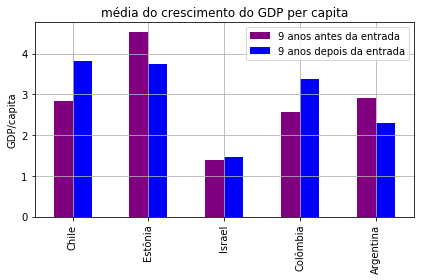

In [264]:
dados_novosGDP_total = gdp_total.set_index("country")
dados_novosGDP_total = dados_novosGDP_total.iloc[:,200:218]
media1 = {"Chile":[2.84,3.81],"Estônia":[4.54,3.74],"Israel":[1.38,1.46],"Colômbia":[2.58,3.39],"Argentina":[2.92,2.31]}
dados_media1 = pd.DataFrame.from_dict(media1, orient = "index", columns = ["9 anos antes da entrada","9 anos depois da entrada"])
dados_media1.plot(kind = 'bar', color = ("purple","blue"))
plt.ylabel("GDP/capita")
plt.title('média do crescimento do GDP per capita')
plt.grid()
plt.tight_layout()

Já neste gráfico, fica mais evidente os valores de crecimento antes e depois da entrada. Mesmo que os níveis de crescimento do PIB não sejam tão grandes, ou até mesmo negativo no caso da Estônia, é perceptível, no gráfico de linhas, uma tendência ao aumento do PIB, mesmo que bem sutil.

# Analisando o IDH

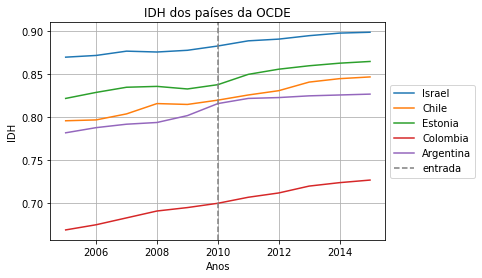

In [266]:
dados_IDH = idh.set_index("country")
dado_IDH = dados_IDH.iloc[:,15:26]
dados_paisesIDH = dado_IDH.loc[["Israel","Chile","Estonia","Colombia","Argentina"]]
dados_testeIDH = dados_paisesIDH.transpose()
plt.plot(dados_paisesIDH.loc["Israel"])
plt.plot(dados_paisesIDH.loc["Chile"])
plt.plot(dados_paisesIDH.loc["Estonia"])
plt.plot(dados_paisesIDH.loc["Colombia"])
plt.plot(dados_paisesIDH.loc["Argentina"])
plt.axvline(x=2010, color = "grey", linestyle = "--", label = "entrada")
ax = plt.subplot(111)
ax.legend(loc="center left", bbox_to_anchor = (1,0.5))
plt.xlabel('Anos')
plt.ylabel("IDH")
plt.title('IDH dos países da OCDE')
plt.grid() 

Nesse gráfico o IDH está sendo analisado e, como apresentado, o comportamento de cada país, seja antes ou depois da entrada, continuou o mesmo, onde todos continuaram crescendo de forma contínua e sem nenhum impacto mediante a entrada. Mesmo com um zoom, apresentado no gráfico seguinte, é notável que o crescimento dos cinco países são bem semelhantes.

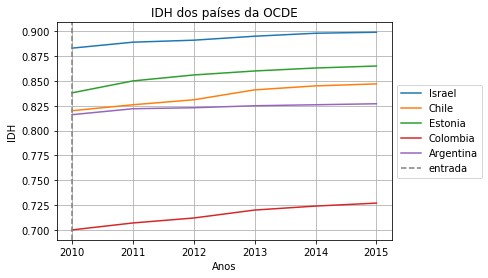

In [295]:
dados_IDH = idh.set_index("country")
dado_IDH = dados_IDH.iloc[:,20:26]
dados_paisesIDH = dado_IDH.loc[["Israel","Chile","Estonia","Colombia","Argentina"]]
dados_testeIDH = dados_paisesIDH.transpose()
plt.plot(dados_paisesIDH.loc["Israel"])
plt.plot(dados_paisesIDH.loc["Chile"])
plt.plot(dados_paisesIDH.loc["Estonia"])
plt.plot(dados_paisesIDH.loc["Colombia"])
plt.plot(dados_paisesIDH.loc["Argentina"])
plt.axvline(x=2010, color = "grey", linestyle = "--", label = "entrada")
ax = plt.subplot(111)
ax.legend(loc="center left", bbox_to_anchor = (1,0.5))
plt.xlabel('Anos')
plt.ylabel("IDH")
plt.title('IDH dos países da OCDE')
plt.grid()

# Conclusão:
Após realizar a leitura dos dados e feitura dos gráficos, foi possível tirar algumas conclusões sobre a hipótese elaborada anteriormente. Entre elas, está o fato de que, após os países ingressarem na Organização, num primeiro momento as taxas de desemprego sofreram um aumento, muitas vezes por causa da crise de 2008 ou apenas algumas mudanças economicas devido a entrada na OCDE, entretanto, nos anos seguintes, foi possível perceber uma queda significativa nestes índices. E, para completar a conclusão, foi realizado algumas pesquisas que afirmam que, para Israel, o ano de 2019, foi o ano com o menor indice de desemprego já registrado.

Agora, argumentando com a adesão do país comparativo no gráfico, os dados dos países membros da OCDE possuem algumas irregularidades, o que permite que os países não-membros, em alguns, anos possuiam taxas menores, porém os membros fecham com uma média menor no período pós entrada no bloco do que o não-membro. Além do fato de que pelo Boxplot apresentado anteriormente foi concluído que os países membros, em geral, possuem uma taxa de desemprego menor.

Outro fator a ser analisado é o PIB/trabalhador, o qual, como apresentado no gráfico anterior, desde a entrada na Organização só houveram crescimentos consideráveis, diferentemente dos não-membros, os quais tiveram um crescimento inferior; o que implica que se o PIB aumentou a economia está num melhor estagio, permitindo melhores oportunidades de emprego. 

Logo, após analisar o emprego, o outro setor foi a economia, a qual, por meio dos gráficos e pesquisas foi possível ver que ao ingressar na OCDE, o PIB, que antes estava desestabilizado, tornou-se uma reta contínua e com um leve crescimento, o qual foi comprovado por meio de pesquisas que afirmam que os países selecionados, nos anos posteriores à entrada obtiveram um crescimento evidente de 26 à 50%.

Assim, o último setor  analisado foi o nível de vida, que após realizar pesquisas e plotar gráficos, não foi possível obter conclusões concretas sobre a influência da OCDE no IDH, por mais que tenha sido notado um crescimento significativo, os países comparados também tiveram um comportamento semelhante

Dessa forma, por meio das conclusões anteriores é possível responder a hipótese abordada anteriormente. Sendo assim, o setor que sofreu um impacto mais significante foi o de empregos, onde as taxas diminuíram consideravelmente nos três países, o que resultou no aumento do PIB e do emprego. Já na área econômica, o impacto foi menor no quesito crescimento, porém a entrada permitiu uma estabilização rápida e um leve sinal de crescimento, o que está dentro de seus objetivos, os quais são: estabilidade financeira e crescimento econômico. E, por fim, o nível de vida foi o que recebeu menos impacto, afinal os dados antes e depois da entrada se comportaram de forma semelhante aos outros países. Logo, dos setores que são mais beneficiados para os menos são, respectivamente, emprego, economia e nível de vida.
        